## Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
import os
import networkx as nx
from gensim.models import Word2Vec
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from PIL import ImageChops
from skimage.metrics import structural_similarity
import math, operator
import time
from skimage.transform import resize

/var/folders/fj/pzrb7szj4jd7yx7ftx9zn1tm0000gn/T/ipykernel_5365/344165671.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread('sunflower1.jpeg')
/var/folders/fj/pzrb7szj4jd7yx7ftx9zn1tm0000gn/T/ipykernel_5365/344165671.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread('sunflower2.jpeg')


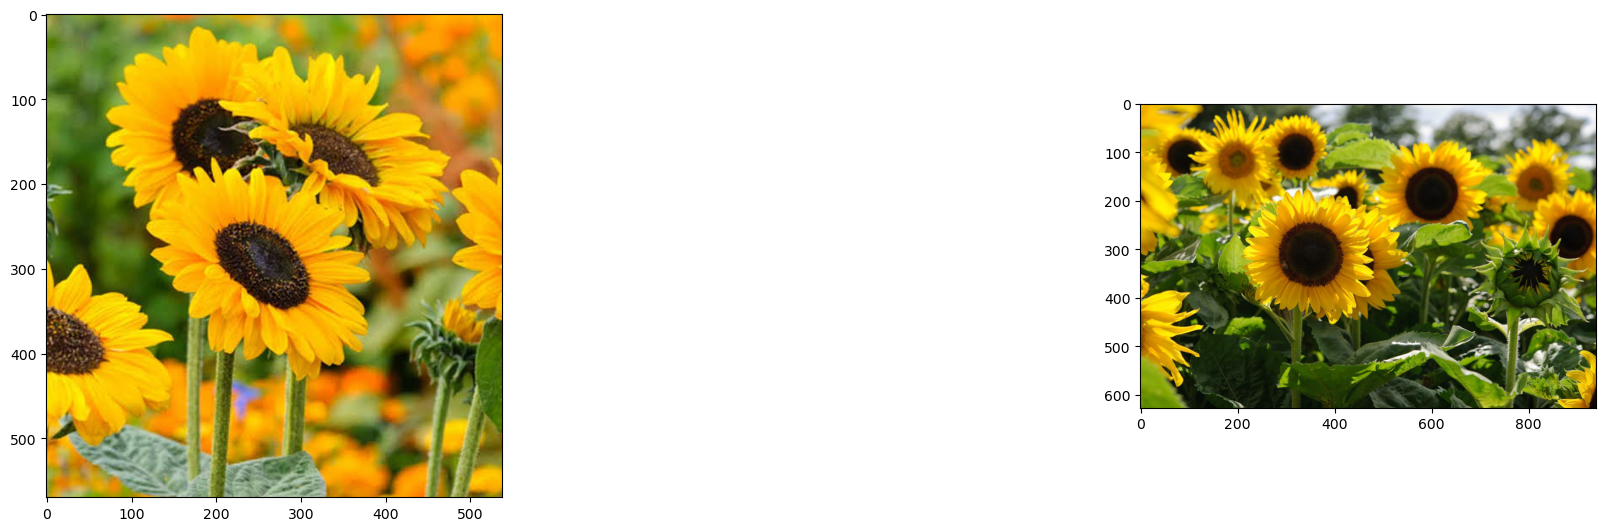

Image 1 size: (570, 538, 3)
Image 2 size:  (627, 940, 3)


In [4]:
img1 = imageio.imread('sunflower1.jpeg')
img2 = imageio.imread('sunflower2.jpeg')
plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(img1)
plt.subplot(133); plt.imshow(img2)
plt.show()
print("Image 1 size:" ,str(img1.shape))
print("Image 2 size: ", str(img2.shape))

In [5]:
def generate_patches(image, num_patches):
    img_height, img_width, _ = image.shape
    

    patch_size = int(np.sqrt((img_height * img_width) / num_patches))
    
    overlap = patch_size // 2

    patches = []

    for i in range(num_patches):
        row_idx = i // (num_patches ** 0.5)
        col_idx = i % (num_patches ** 0.5)   
        
        start_row = int(row_idx * (patch_size - overlap))
        end_row = start_row + patch_size
        start_col = int(col_idx * (patch_size - overlap))
        end_col = start_col + patch_size

        patch = image[start_row:end_row, start_col:end_col, :]
        patches.append(patch)

    patch_dict = {'P' + str(i + 1): patches[i] for i in range(num_patches)}

    return patch_dict

In [7]:
patchDict1 = generate_patches(img1, 6)
patchDict2 = generate_patches(img2, 6)

In [8]:
patchDict1.keys()

dict_keys(['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])

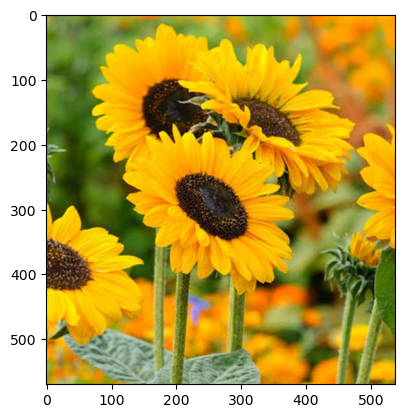

In [11]:
plt.imshow(img1)

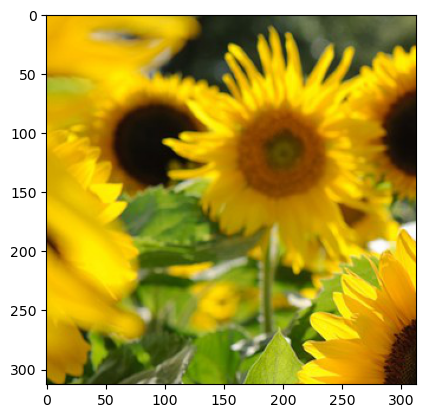

In [12]:
plt.imshow(patchDict2['P1'])

## Display Histograms 

##### Image 1

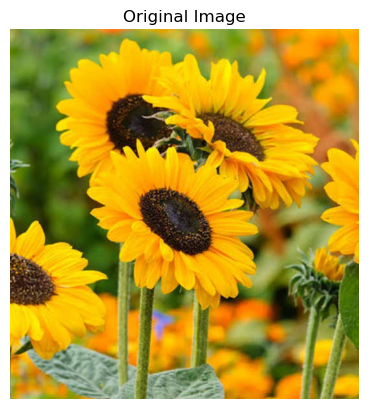

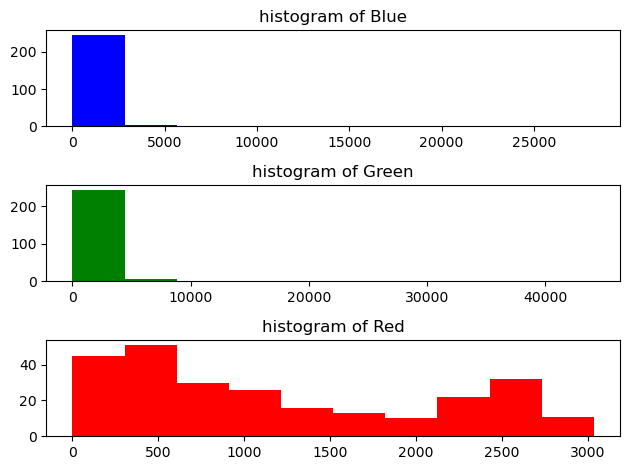

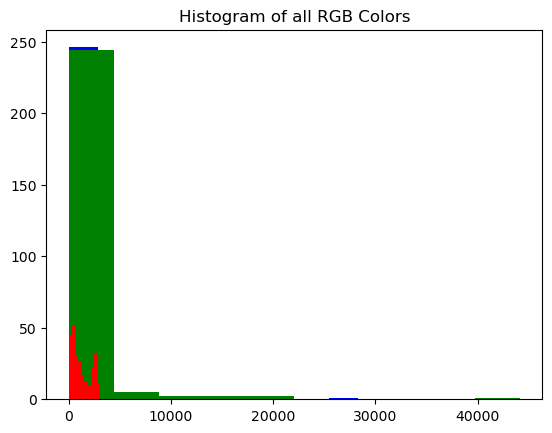

In [13]:
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(img1) 
plt.show() 

blue_color = cv2.calcHist([img1], [0], None, [256], [0, 256]) 
red_color = cv2.calcHist([img1], [1], None, [256], [0, 256]) 
green_color = cv2.calcHist([img1], [2], None, [256], [0, 256]) 

plt.subplot(3, 1, 1) 
plt.title("histogram of Blue") 
plt.hist(blue_color, color="blue") 

plt.subplot(3, 1, 2) 
plt.title("histogram of Green") 
plt.hist(green_color, color="green") 

plt.subplot(3, 1, 3) 
plt.title("histogram of Red") 
plt.hist(red_color, color="red") 

plt.tight_layout() 
plt.show() 

plt.title("Histogram of all RGB Colors") 
plt.hist(blue_color, color="blue") 
plt.hist(green_color, color="green") 
plt.hist(red_color, color="red") 
plt.show() 


##### Image 2

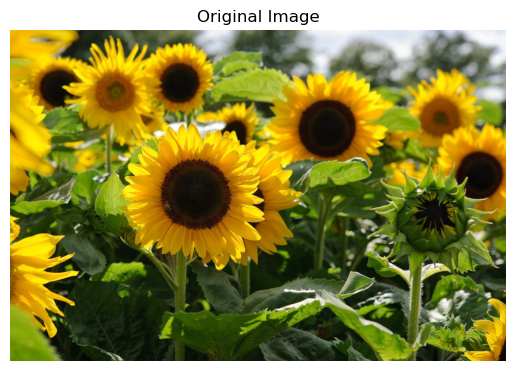

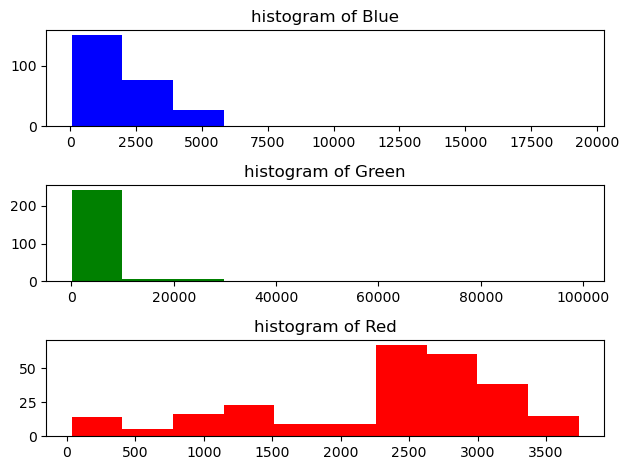

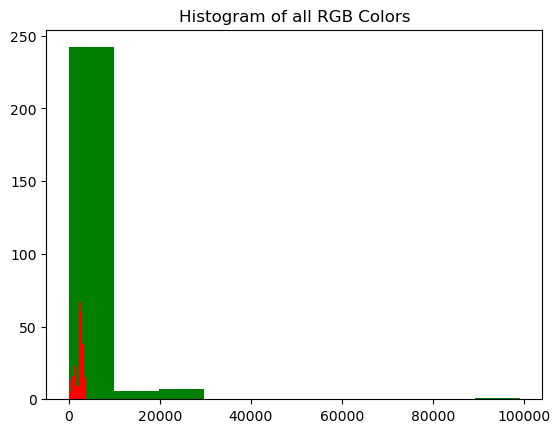

In [14]:
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(img2) 
plt.show() 

blue_color = cv2.calcHist([img2], [0], None, [256], [0, 256]) 
red_color = cv2.calcHist([img2], [1], None, [256], [0, 256]) 
green_color = cv2.calcHist([img2], [2], None, [256], [0, 256]) 

plt.subplot(3, 1, 1) 
plt.title("histogram of Blue") 
plt.hist(blue_color, color="blue") 

plt.subplot(3, 1, 2) 
plt.title("histogram of Green") 
plt.hist(green_color, color="green") 

plt.subplot(3, 1, 3) 
plt.title("histogram of Red") 
plt.hist(red_color, color="red") 

plt.tight_layout() 
plt.show() 

plt.title("Histogram of all RGB Colors") 
plt.hist(blue_color, color="blue") 
plt.hist(green_color, color="green") 
plt.hist(red_color, color="red") 
plt.show() 


## Color Histogram Comparison 

In [18]:
def calculate_histogram(image):
    image = image.astype('uint8')
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    
    blue_hist = cv2.calcHist([blue_channel], [0], None, [256], [0, 256]) 
    green_hist = cv2.calcHist([green_channel], [0], None, [256], [0, 256]) 
    red_hist = cv2.calcHist([red_channel], [0], None, [256], [0, 256]) 
    
    return blue_hist, green_hist, red_hist

def compare_histograms(hist1, hist2):
    bhattacharyya = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    return bhattacharyya

blue_color1, green_color1, red_color1 = calculate_histogram(img1)
blue_color2, green_color2, red_color2 = calculate_histogram(img2)


bhattacharyya_blue = compare_histograms(blue_color1, blue_color2)
bhattacharyya_green = compare_histograms(green_color1, green_color2)
bhattacharyya_red = compare_histograms(red_color1, red_color2)


overall_similarity = (bhattacharyya_blue + bhattacharyya_green + bhattacharyya_red) / 3

print("Overall similarity between the images:", overall_similarity)

Overall similarity between the images: 0.24398964397786482


In [21]:
def compare_patches(patch1 , patch2):
    blue_color1, green_color1, red_color1 = calculate_histogram(patch1)
    blue_color2, green_color2, red_color2 = calculate_histogram(patch2)


    bhattacharyya_blue = compare_histograms(blue_color1, blue_color2)
    bhattacharyya_green = compare_histograms(green_color1, green_color2)
    bhattacharyya_red = compare_histograms(red_color1, red_color2)


    overall_similarity = (bhattacharyya_blue + bhattacharyya_green + bhattacharyya_red) / 3
    return overall_similarity

### Creating Graphs

#### Image 1

In [22]:
GraphImage1 = nx.Graph()

for key in patchDict1:
    GraphImage1.add_node(key)

for key1 in patchDict1:
    for key2 in patchDict1:
        if key1 != key2:
            intersection = compare_patches(patchDict1[key1], patchDict1[key2])
            GraphImage1.add_edge(key1, key2, weight=intersection)

print("Nodes in GraphImage1:")
for node in GraphImage1.nodes():
    print(node)

print("Edges in GraphImage1 with weights and intersection:")
for edge in GraphImage1.edges(data=True):
    print(edge)

Nodes in GraphImage1:
P1
P2
P3
P4
P5
P6
Edges in GraphImage1 with weights and intersection:
('P1', 'P2', {'weight': 0.20956008190382813})
('P1', 'P3', {'weight': 0.21485781731617848})
('P1', 'P4', {'weight': 0.23035383568785492})
('P1', 'P5', {'weight': 0.22873971982206154})
('P1', 'P6', {'weight': 0.22776451843375065})
('P2', 'P3', {'weight': 0.14231119992021843})
('P2', 'P4', {'weight': 0.20708375144052824})
('P2', 'P5', {'weight': 0.16544505558720646})
('P2', 'P6', {'weight': 0.21136651234327797})
('P3', 'P4', {'weight': 0.2790702198304276})
('P3', 'P5', {'weight': 0.22255028572533828})
('P3', 'P6', {'weight': 0.25204292070708245})
('P4', 'P5', {'weight': 0.10664202171086784})
('P4', 'P6', {'weight': 0.12177932757323336})
('P5', 'P6', {'weight': 0.15381078359911773})


#### Image 2

In [25]:
GraphImage2 = nx.Graph()

for key in patchDict2:
    GraphImage2.add_node(key)

for key1 in patchDict2:
    for key2 in patchDict2:
        if key1 != key2:
            intersection = compare_patches(patchDict2[key1], patchDict2[key2])
            GraphImage2.add_edge(key1, key2, weight=intersection)


print("Nodes in GraphImage2:")
for node in GraphImage2.nodes():
    print(node)

print("Edges in GraphImage2 with weights and intersection:")
for edge in GraphImage2.edges(data=True):
    print(edge)

Nodes in GraphImage2:
P1
P2
P3
P4
P5
P6
Edges in GraphImage2 with weights and intersection:
('P1', 'P2', {'weight': 0.10328907239095719})
('P1', 'P3', {'weight': 0.17470787442009797})
('P1', 'P4', {'weight': 0.17902230556860144})
('P1', 'P5', {'weight': 0.1873776514597634})
('P1', 'P6', {'weight': 0.3210083797436811})
('P2', 'P3', {'weight': 0.0986394313968446})
('P2', 'P4', {'weight': 0.1488592569556506})
('P2', 'P5', {'weight': 0.1658340547222763})
('P2', 'P6', {'weight': 0.3110534891469983})
('P3', 'P4', {'weight': 0.17992601288515433})
('P3', 'P5', {'weight': 0.18726124126651703})
('P3', 'P6', {'weight': 0.3270556629090859})
('P4', 'P5', {'weight': 0.13025790604612605})
('P4', 'P6', {'weight': 0.19854797910028743})
('P5', 'P6', {'weight': 0.2353454763442477})


#### Visualizations

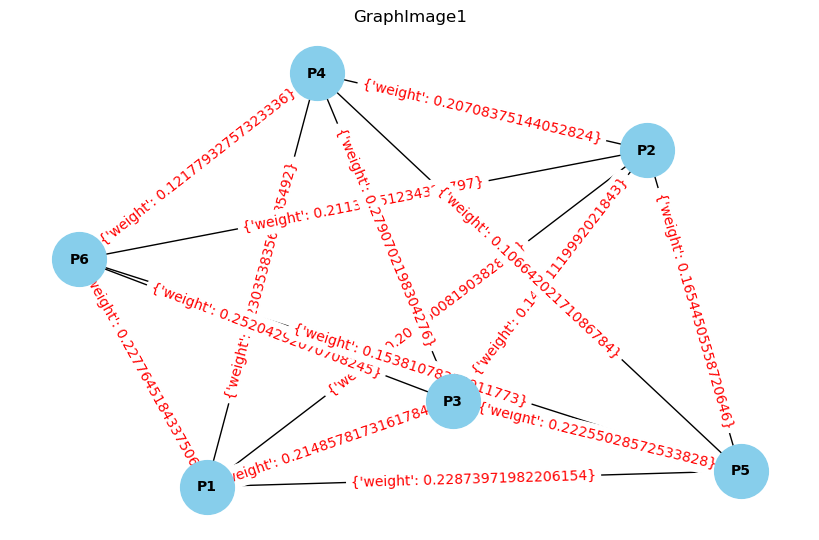

In [26]:
plt.figure(figsize=(8, 5))
pos1 = nx.spring_layout(GraphImage1)
nx.draw(GraphImage1, pos=pos1, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(GraphImage1, pos=pos1, font_color='red')
plt.title('GraphImage1')
plt.show()

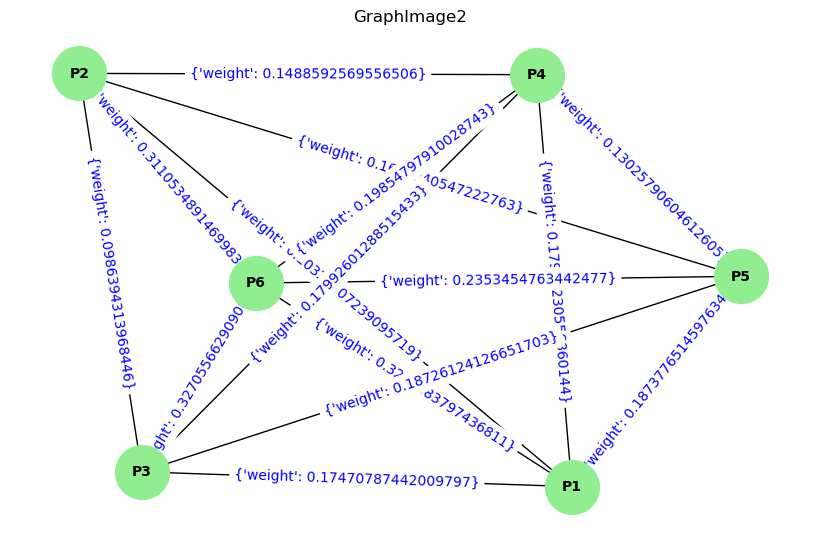

In [27]:
plt.figure(figsize=(8, 5))
pos2 = nx.spring_layout(GraphImage2)
nx.draw(GraphImage2, pos=pos2, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(GraphImage2, pos=pos2, font_color='blue')
plt.title('GraphImage2')
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_add_pool

# Graph Neural Network

In [25]:

graph1_data = Data(x=torch.randn(len(GraphImage1.nodes()), 1))
edges1 = torch.tensor([[list(GraphImage1.nodes()).index(edge[0]), list(GraphImage1.nodes()).index(edge[1])] for edge in GraphImage1.edges()]).t().contiguous()
graph1_data.edge_index = edges1

graph2_data = Data(x=torch.randn(len(GraphImage2.nodes()), 1))
edges2 = torch.tensor([[list(GraphImage2.nodes()).index(edge[0]), list(GraphImage2.nodes()).index(edge[1])] for edge in GraphImage2.edges()]).t().contiguous()
graph2_data.edge_index = edges2


class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_add_pool(x, torch.zeros(x.size(0), dtype=torch.long))
        x = self.fc(x)
        return torch.sigmoid(x)



input_dim = 1
hidden_dim = 6
num_epochs = 4
criterion = nn.MSELoss()
model = GNNModel(input_dim, hidden_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output1 = model(graph1_data)
    output2 = model(graph2_data)
    loss = criterion(output1, output2)
    loss.backward()
    optimizer.step()

    # Print the loss at each iteration
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

similarity_score = model(graph1_data)


Epoch 1/4, Loss: 0.0066939485259354115
Epoch 2/4, Loss: 0.0038512805476784706
Epoch 3/4, Loss: 0.0018874257802963257
Epoch 4/4, Loss: 0.0006640626234002411


In [26]:
similarity_score

tensor([[0.5522]], grad_fn=<SigmoidBackward0>)

# Graph Embedding Method

In [28]:
def convertComparable(graph_data):
    graph = nx.Graph()
    for edge in graph_data.edges(data=True):
        source = str(edge[0])
        target = str(edge[1])
        weight = edge[2]['weight'] if 'weight' in edge[2] else 1
        graph.add_edge(source, target, weight=weight)
    return graph

In [29]:
GraphImage1_nx = convertComparable(GraphImage1)
GraphImage2_nx = convertComparable(GraphImage2)

GraphImage1_nx

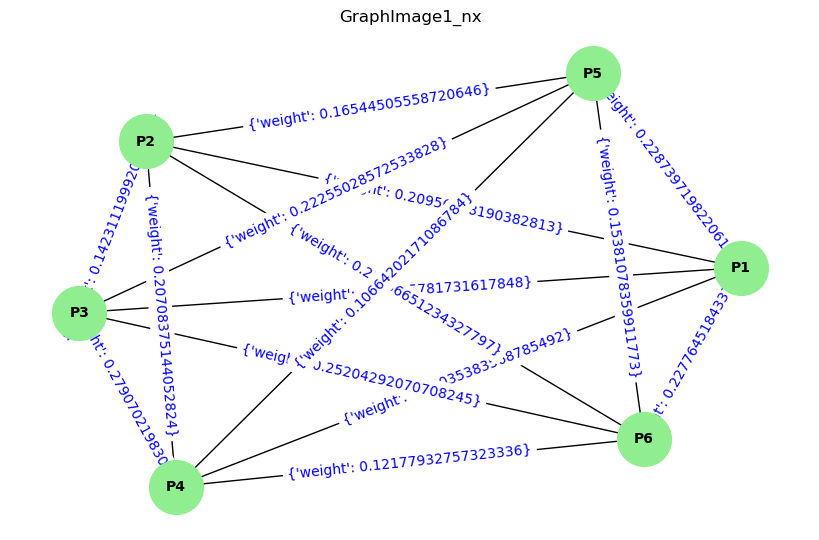

In [30]:
plt.figure(figsize=(8, 5))
pos2 = nx.spring_layout(GraphImage1_nx)
nx.draw(GraphImage1_nx, pos=pos2, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(GraphImage1_nx, pos=pos2, font_color='blue')
plt.title('GraphImage1_nx')
plt.show()

In [31]:
combinedGraph = nx.compose(GraphImage1_nx, GraphImage2_nx)
combinedGraph.edges()

EdgeView([('P1', 'P2'), ('P1', 'P3'), ('P1', 'P4'), ('P1', 'P5'), ('P1', 'P6'), ('P2', 'P3'), ('P2', 'P4'), ('P2', 'P5'), ('P2', 'P6'), ('P3', 'P4'), ('P3', 'P5'), ('P3', 'P6'), ('P4', 'P5'), ('P4', 'P6'), ('P5', 'P6')])

In [32]:
for edge in combinedGraph.edges(data=True):
    print("Edge:", edge[:2])
    print("Weight:", edge[2]['weight'])

Edge: ('P1', 'P2')
Weight: 0.10328907239095719
Edge: ('P1', 'P3')
Weight: 0.17470787442009797
Edge: ('P1', 'P4')
Weight: 0.17902230556860144
Edge: ('P1', 'P5')
Weight: 0.1873776514597634
Edge: ('P1', 'P6')
Weight: 0.3210083797436811
Edge: ('P2', 'P3')
Weight: 0.0986394313968446
Edge: ('P2', 'P4')
Weight: 0.1488592569556506
Edge: ('P2', 'P5')
Weight: 0.1658340547222763
Edge: ('P2', 'P6')
Weight: 0.3110534891469983
Edge: ('P3', 'P4')
Weight: 0.17992601288515433
Edge: ('P3', 'P5')
Weight: 0.18726124126651703
Edge: ('P3', 'P6')
Weight: 0.3270556629090859
Edge: ('P4', 'P5')
Weight: 0.13025790604612605
Edge: ('P4', 'P6')
Weight: 0.19854797910028743
Edge: ('P5', 'P6')
Weight: 0.2353454763442477


In [33]:
node2vec = Node2Vec(combinedGraph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/6 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 642.51it/s]


In [34]:
graph1_embeddings = np.array([model.wv[str(node)] for node in GraphImage1_nx.nodes()])
graph2_embeddings = np.array([model.wv[str(node)] for node in GraphImage2_nx.nodes()])

In [35]:
graph1_embeddings

array([[-3.14515196e-02,  2.07994059e-02,  1.67161107e-01,
         1.45051092e-01, -1.37411997e-01, -1.63643464e-01,
         2.04458728e-01,  2.70727456e-01, -2.77884863e-02,
         3.03475726e-02,  2.58218467e-01,  1.06261134e-01,
         6.43043295e-02,  5.93770333e-02, -1.68230876e-01,
        -7.18696648e-03,  1.85029507e-02,  1.49044737e-01,
        -8.05824921e-02,  8.64879042e-03,  1.94061339e-01,
         1.56148255e-01,  2.85629898e-01, -1.94287315e-01,
         1.24767423e-01,  7.22678527e-02, -9.63418037e-02,
         1.31988987e-01, -3.56357358e-03, -4.51856665e-02,
        -5.18352166e-02,  2.82587893e-02, -8.40194430e-03,
        -1.87240958e-01, -9.01111215e-02,  3.44190262e-02,
         1.04115121e-01,  6.53095469e-02,  2.49078065e-01,
        -1.09501027e-01,  3.04900911e-02,  1.04939528e-01,
        -1.01254202e-01, -1.69875488e-01,  7.35718384e-03,
         7.27821365e-02, -1.05570853e-01, -8.41627456e-03,
        -8.43443424e-02,  7.89081305e-02,  3.06371320e-0

In [40]:
similarity_matrix = cosine_similarity(graph1_embeddings, graph2_embeddings)

average_similarity = np.mean(similarity_matrix)
print("Average similarity score between GraphImage1 and GraphImage2:", average_similarity)

Average similarity score between GraphImage1 and GraphImage2: 0.98189175


## Comparison

1. Structural Similarity Index (SSIM)
2. Root Mean Square Error (RMSE)
3. Peak Signal-to-Noise Ratio (PSNR)
4. Image Structural Similarity Measure (ISSM)

In [36]:
def rmsdiff(im1, im2):
    diff = ImageChops.difference(im1, im2)
    h = diff.histogram()
    sq = (value*((idx%256)**2) for idx, value in enumerate(h))
    sum_of_squares = sum(sq)
    rms = math.sqrt(sum_of_squares/float(im1.size[0] * im1.size[1]))
    return rms

def PSNR(img1, img2): 
    mse = np.mean((img1 - img2) ** 2) 
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

### Computational Times and Scores

In [70]:
import cv2

img1resized_uint8 = img1resized.astype(np.uint8)

img1_rgb = cv2.cvtColor(img1resized_uint8, cv2.COLOR_RGBA2RGB)

img2resized_uint8 = img2resized.astype(np.uint8)
img2_rgb = cv2.cvtColor(img2resized_uint8, cv2.COLOR_RGBA2RGB)
img1_gray = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2GRAY)

print(img1_rgb.shape)
print(img2resized.shape)
win_size = 7

(250, 250, 3)
(250, 250, 3)


In [71]:

win_size = 7

start_time = time.time()
ssim_score, _ = ssim(img1_gray, img2_gray, full=True, win_size=win_size)
ssim_time = time.time() - start_time

print("Image similarity using SSIM:", ssim_score)
print("SSIM computation time:", ssim_time)

Image similarity using SSIM: 0.9999961399518814
SSIM computation time: 0.02372598648071289


In [75]:
from PIL import Image
img1_pil = Image.fromarray(np.uint8(img1_rgb))
img2_pil = Image.fromarray(np.uint8(img2resized))

start_time = time.time()
rmse_score = rmsdiff(img1_pil, img2_pil)
rmse_time = time.time() - start_time

print("Image similarity using RMSE:", rmse_score)
print("RMSE computation time:", rmse_time)

Image similarity using RMSE: 0.14322011031974524
RMSE computation time: 0.0032110214233398438


In [77]:
from math import log10

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / np.sqrt(mse))
    return psnr

start_time = time.time()
psnr_score = PSNR(np.array(img1_rgb), np.array(img2resized))
psnr_time = time.time() - start_time
print("Image similarity using PSNR:", psnr_score)
print("PSNR computation time:", psnr_time)

Image similarity using PSNR: 53.274661958565595
PSNR computation time: 0.0056078433990478516


In [81]:
start_time = time.time()
ssim_score, _ = ssim(img1_gray, img2_gray, full=True, win_size=win_size)
ssim_time = time.time() - start_time

print("Image similarity using SSIM:", ssim_score)
print("ISSIM computation time:", ssim_time)

Image similarity using SSIM: 0.9999961399518814
ISSIM computation time: 0.01240396499633789


### Our Defined Method

In [79]:
def customCheckSimilarity(GraphImage1_nx, GraphImage2_nx):
    start_time = time.time()

    combinedGraph = nx.compose(GraphImage1_nx, GraphImage2_nx)
    node2vec = Node2Vec(combinedGraph, dimensions=64, walk_length=30, num_walks=200, workers=4)
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    graph1_embeddings = np.array([model.wv[str(node)] for node in GraphImage1_nx.nodes()])
    graph2_embeddings = np.array([model.wv[str(node)] for node in GraphImage2_nx.nodes()])
    similarity_matrix = cosine_similarity(graph1_embeddings, graph2_embeddings)

    average_similarity = np.mean(similarity_matrix)*10
    print("Average similarity score between GraphImage1 and GraphImage2:", average_similarity*100)

    elapsed_time = time.time() - start_time
    print("Execution time:", elapsed_time, "seconds")


customCheckSimilarity(GraphImage1_nx, GraphImage2_nx)

Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 337.81it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 335.28it/s]


Average similarity score between GraphImage1 and GraphImage2: 89.91175889968872
Execution time: 4.6318359375 seconds
